In [ ]:
import sys

sys.path.append('../src')

import numpy as np
import matplotlib.pyplot as plt

from geometry import (create_receiver_array, plot_acquisition_geometry)

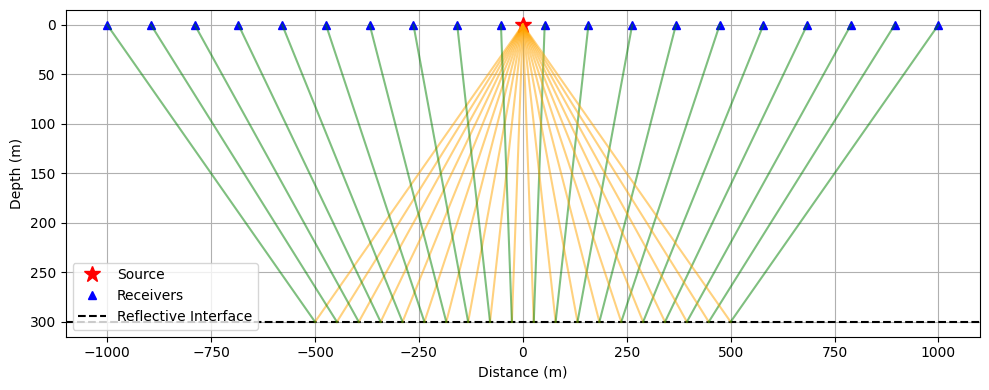

In [4]:
# Create multiple sources
sources = (0, 0)

# Create receivers
receivers_x, receivers_z = create_receiver_array(20, -1000, 1000, z=0)

# Set interface depth
reflection_depth = 300

# Generate the acquisition geometry graph
fig, ax = plot_acquisition_geometry(
    sources, receivers_x, receivers_z, 
    reflection_depth, show_rays=True, 
    # save_path="geometry_plot.png"
)

plt.show()